In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import Sequential
from keras import layers
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import adam_v2
from tensorflow.keras.utils import to_categorical

In [2]:
df = pd.read_csv('F:/data_edge/3_data/data.csv', header=None)


In [3]:
df = df.sort_values([1, 0])
df

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,1001
0,0,0,66,66,-66,54,-66,54,1113,-54,...,0,0,0,0,0,0,0,0,0,0
100,1,0,66,66,-66,54,-66,54,691,-54,...,0,0,0,0,0,0,0,0,0,0
200,2,0,66,-66,54,66,-66,54,730,-54,...,0,0,0,0,0,0,0,0,0,0
300,3,0,66,66,-66,54,-66,54,801,-54,...,0,0,0,0,0,0,0,0,0,0
400,4,0,66,66,-66,54,-66,54,1352,-54,...,-1494,-1494,-1494,54,-1494,-1494,-1494,-1494,54,-1494
500,5,0,66,66,-66,54,-66,54,706,-54,...,0,0,0,0,0,0,0,0,0,0
600,6,0,66,66,-66,54,-66,54,615,-54,...,0,0,0,0,0,0,0,0,0,0
700,7,0,66,66,-66,54,-66,54,853,-54,...,-1494,54,-1494,54,-1494,-1494,54,-1494,54,-1488
800,8,0,66,-66,54,571,-54,-1494,-1494,-1270,...,0,0,0,0,0,0,0,0,0,0
900,9,0,66,66,-66,54,-66,54,1186,-54,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(df)
data.shape

(10000, 1002)

In [5]:
train = data[0 : 70*100]
train_data = train[:, 2:502]
train_index = train[:, 0]
train_index = to_categorical(train_index)

test = data[70*100 : 100*100]
test_data = test[:, 2:502]
test_index = test[:, 0]
test_index = to_categorical(test_index)

In [6]:
train_data.shape

(7000, 500)

In [7]:
model  = Sequential()
model.add(Conv1D(input_shape = (500, 1),
                 filters=32,
                 kernel_size=5,
                 padding = 'same',
                 strides=1,
                 activation='relu'))
model.add(Conv1D(filters=32,
                 kernel_size=5,
                 padding = 'same',
                 strides=1,
                 activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64,
                 kernel_size=5,
                 padding = 'same',
                 activation='relu'))
model.add(Conv1D(filters=64,
                 kernel_size=5,
                 padding = 'same',
                 activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128,
                 kernel_size=5,
                 padding = 'same',
                 activation='relu'))
model.add(Conv1D(filters=128,
                 kernel_size=5,
                 padding = 'same',
                 activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256,
                 kernel_size=5,
                 padding = 'same',
                 activation='relu'))
model.add(Conv1D(filters=256,
                 kernel_size=5,
                 padding = 'same',
                 activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(100, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=adam_v2.Adam(learning_rate=0.001),
              metrics='accuracy')

In [8]:
model.fit(train_data.astype('float32')/1514, train_index, epochs = 10)

Epoch 1/10
219/219 [==============================] - 43s 190ms/step - loss: 1.6548 - accuracy: 0.5989
Epoch 2/10
219/219 [==============================] - 41s 187ms/step - loss: 0.2864 - accuracy: 0.9261
Epoch 3/10
219/219 [==============================] - 41s 188ms/step - loss: 0.1075 - accuracy: 0.9703
Epoch 4/10
219/219 [==============================] - 41s 188ms/step - loss: 0.0783 - accuracy: 0.9769
Epoch 5/10
219/219 [==============================] - 41s 187ms/step - loss: 0.0762 - accuracy: 0.9794
Epoch 6/10
219/219 [==============================] - 41s 188ms/step - loss: 0.0502 - accuracy: 0.9867
Epoch 7/10
219/219 [==============================] - 41s 188ms/step - loss: 0.0610 - accuracy: 0.9831
Epoch 8/10
219/219 [==============================] - 41s 188ms/step - loss: 0.0453 - accuracy: 0.9883
Epoch 9/10
219/219 [==============================] - 41s 188ms/step - loss: 0.0277 - accuracy: 0.9921
Epoch 10/10
219/219 [==============================] - 41s 189ms/step - l

In [9]:
model.evaluate(test_data.astype('float32')/1514, test_index)

94/94 [==============================] - 4s 42ms/step - loss: 0.2851 - accuracy: 0.9483


[0.2850857675075531, 0.9483333230018616]

In [10]:
df_ow = pd.read_csv('F:/data_edge/3_data/data_ow.csv', header=None)

In [11]:
df_ow

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,1001
0,100,0,66,66,-66,54,-66,54,524,-54,...,-1494,54,-1494,-1494,-182,54,-1494,-1366,54,-1494
1,101,0,66,66,-66,54,-66,54,1048,-54,...,0,0,0,0,0,0,0,0,0,0
2,102,0,66,66,-66,-66,54,54,527,-54,...,0,0,0,0,0,0,0,0,0,0
3,103,0,66,-66,54,529,66,-54,-527,-66,...,0,0,0,0,0,0,0,0,0,0
4,104,0,66,-66,54,66,-66,54,630,-54,...,0,0,0,0,0,0,0,0,0,0
5,105,0,66,66,-66,54,571,-66,54,571,...,0,0,0,0,0,0,0,0,0,0
6,106,0,66,66,-66,54,-66,54,1028,-54,...,-1494,-1494,54,-1494,-1494,54,-1494,-1494,54,-1494
7,107,0,66,66,-66,54,-66,54,527,-54,...,-1494,-1494,54,-1494,-1494,54,499,-1494,-1494,54
8,108,0,66,66,-66,54,-66,54,564,-172,...,0,0,0,0,0,0,0,0,0,0
9,109,0,66,66,-66,54,-66,54,1494,136,...,-1494,54,-1494,-1494,-1494,54,-1494,-1494,-1494,-1494


In [12]:
data_ow = np.array(df_ow)
data_ow.shape

(1000, 1002)

In [13]:
test_data_ow = data_ow[:, 2:502]
test_data_ow

array([[   66,    66,   -66, ..., -1494,    54, -1494],
       [   66,    66,   -66, ...,     0,     0,     0],
       [   66,    66,   -66, ...,     0,     0,     0],
       ...,
       [   66,    66,   -66, ...,    54, -1494, -1494],
       [   66,    66,   -66, ...,     0,     0,     0],
       [   66,    66,   -66, ..., -1494, -1494,    54]], dtype=int64)

In [15]:
res = model.predict(test_data.astype('float32')/1514)

In [16]:
res_ow = model.predict(test_data_ow.astype('float32')/1514)

In [18]:
res.shape

(3000, 100)

In [19]:
res_ow.shape

(1000, 100)

In [112]:
list_prob_threshold = 1.0 - 1 / np.logspace(0.01, 20, 100, endpoint=True)

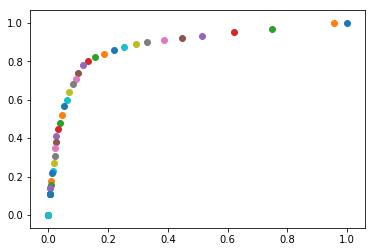

In [124]:
for prob_threshold in list_prob_threshold:
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    for i in range(1000):
        if max(res[i]) > prob_threshold:
            TP += 1
        else:
            FN += 1

    for i in range(1000):
        if max(res_ow[i]) > prob_threshold:
            FP += 1
        else:
            TN += 1

    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    
    plt.scatter(FPR, TPR)

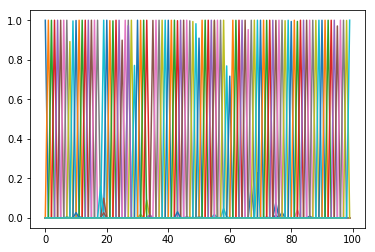

In [126]:
for i in range(100):
    plt.plot(res[i])

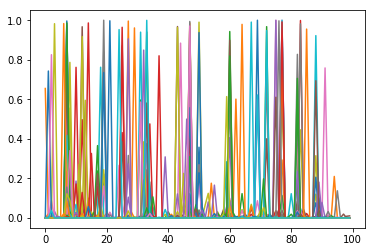

In [127]:
for i in range(100):
    plt.plot(res_ow[i])